<a href="https://colab.research.google.com/github/shadowx002/Geesture_Recognition/blob/main/p11_v102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dirs

In [ ]:
import os
import tensorflow as tf

# Define the input directory (Dir X) containing subdirectories for each class
input_dir = '/content/drive/MyDrive/p11_v101/'  # Replace with the actual path

# Define the output directory (Dir Y) where resized and padded images will be saved
output_dir = '/content/drive/MyDrive/p11_v101_resized_padded/'  # Replace with the desired output path

# Define the target image size (e.g., 512x512 pixels)
target_size = (512, 512)

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate through each class directory in the input directory
for class_name in os.listdir(input_dir):
    print("Processing class:", class_name)

    class_input_dir = os.path.join(input_dir, class_name)
    class_output_dir = os.path.join(output_dir, class_name)

    print("Input directory:", class_input_dir)
    print("Output directory:", class_output_dir)

    if not os.path.exists(class_output_dir):
        os.makedirs(class_output_dir)

    # Iterate through each image file in the class directory
    for image_filename in os.listdir(class_input_dir):
        image_path = os.path.join(class_input_dir, image_filename)

        # Read and decode the image
        img = tf.io.read_file(image_path)
        img = tf.image.decode_image(img, channels=3, expand_animations=False)

        # Resize the image while preserving the aspect ratio and adding padding
        img = tf.image.resize_with_pad(img, target_height=target_size[0], target_width=target_size[1])

        # Convert the image to a NumPy array
        img_array = img.numpy()

        # Save the resized and padded image with the same filename in the output directory
        output_path = os.path.join(class_output_dir, image_filename)
        tf.io.write_file(output_path, tf.image.encode_jpeg(img_array))

print("Image resizing and padding complete.")


Processing class: call_gesture
Input directory: /content/drive/MyDrive/p11_v101/call_gesture
Output directory: /content/drive/MyDrive/p11_v101_resized_padded/call_gesture
Processing class: thumpsUp_gesture
Input directory: /content/drive/MyDrive/p11_v101/thumpsUp_gesture
Output directory: /content/drive/MyDrive/p11_v101_resized_padded/thumpsUp_gesture


KeyboardInterrupt: ignored

In [ ]:
dir_data = '/content/drive/MyDrive/p11_v101_resized_padded'
dir_checkpoint = '/content/drive/MyDrive/p11v2_models'

## Imports

In [ ]:
#imports
import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

## Global variables

In [ ]:
img_height = 512
img_width = 512
batch_size = 4
num_classes = 4

## Data loading


In [ ]:
import tensorflow as tf

##################################################################################
# train_ds
train_ds = tf.keras.utils.image_dataset_from_directory(
  dir_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


##################################################################################
#val_ds
val_ds = tf.keras.utils.image_dataset_from_directory(
  dir_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
##################################################################################
#class_names

Found 435 files belonging to 4 classes.
Using 348 files for training.
Found 435 files belonging to 4 classes.
Using 87 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['call_gesture', 'loser_gesture', 'thumpsUp_gesture', 'victory_gesture']


## Input Data Visualizations

In [ ]:
#plt.figure(figsize=(10, 10))
#for images, labels in train_ds.take(1):
#  for i in range(9):
#    ax = plt.subplot(3, 3, i + 1)
#    plt.imshow(images[i].numpy().astype("uint8"))
#    plt.title(class_names[labels[i]])
#    plt.axis("off")

## Base model

### Variables

In [ ]:
epochs=50

### Model 001

In [ ]:
model_001 = Sequential([
    layers.Rescaling(1./255,
                     input_shape=(img_height,img_width, 3)),
    layers.Conv2D(filters=64,
                  padding='valid',
                  kernel_size=3,
                  activation='relu'),
    layers.MaxPool2D(),




    layers.Conv2D(filters=128,
                  padding='valid',
                  kernel_size=16,
                  activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=256,
                  padding='valid',
                  kernel_size=4,
                  activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=512,
                  padding='valid',
                  kernel_size=4,
                  activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=1024,
                  padding='valid',
                  kernel_size=4,
                  activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=512,
                  padding='valid',
                  kernel_size=4,
                  activation='relu'),
    layers.MaxPool2D(),



    layers.Conv2D(filters=128,
                  padding='valid',
                  kernel_size=4,
                  activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(units=128,
                 activation='relu'),
    # added v3
    #layers.MaxPool(),
    layers.Dense(units=64,
                 activation='relu'),


    layers.Dense(units=4,
                 #activation='softmax'
                 )
])

### Compilation

In [ ]:
learning_rate = 0.00001

In [ ]:
model_001.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

### Callbacks

In [ ]:
model_001_checkpoint = ModelCheckpoint(filepath=dir_checkpoint,
                                       monitor='val_accuracy',
                                       verbose=1,
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='max')

### Model 001 Summary

In [ ]:
model_001.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 512, 512, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 510, 510, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 255, 255, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 240, 240, 128)     2097280   
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 120, 120, 128)     0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 117, 117, 256)    

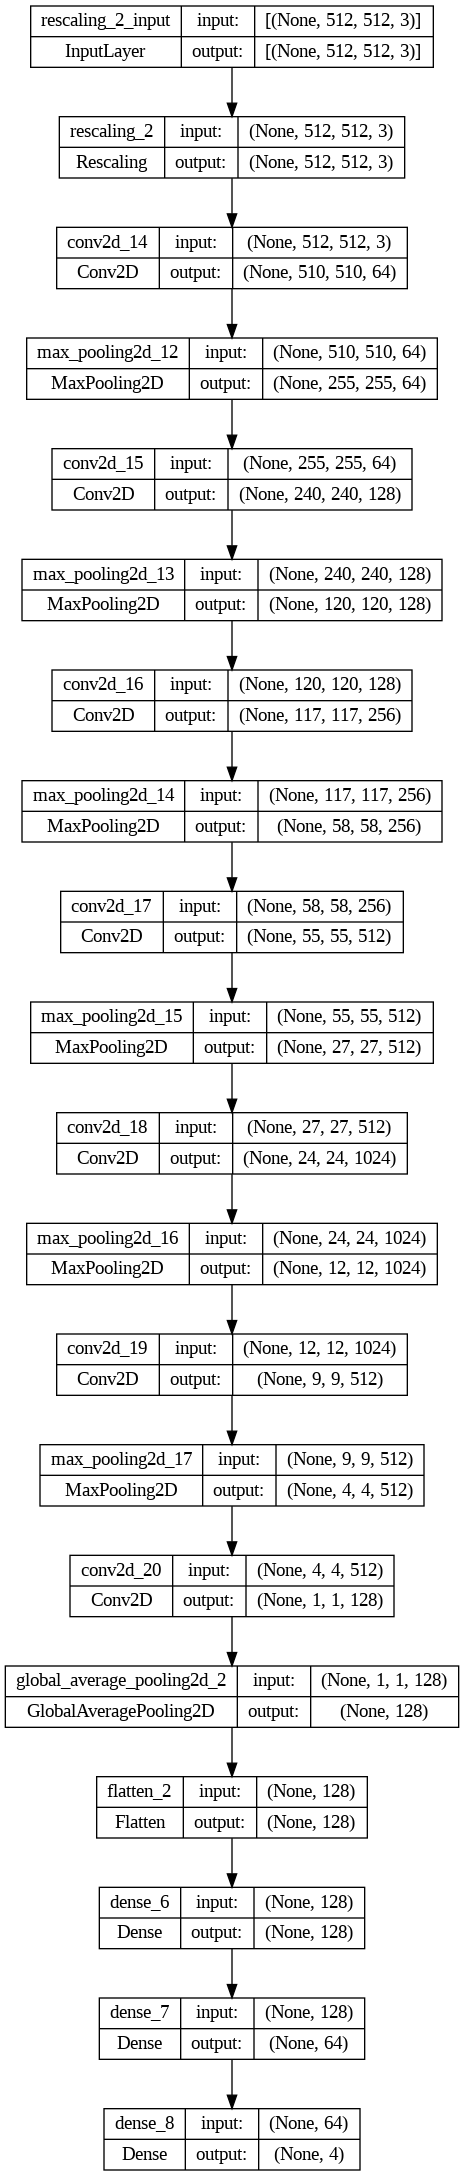

In [ ]:
tf.keras.utils.plot_model(model_001, show_shapes=True)

### Fitting

In [ ]:
his_model_001 = model_001.fit(x=train_ds,
                              validation_data=val_ds,
                              epochs=epochs,
                              callbacks=[model_001_checkpoint])

Epoch 1/50
87/87 [==============================] - ETA: 0s - loss: 1.3890 - accuracy: 0.2586
Epoch 1: val_accuracy improved from -inf to 0.21839, saving model to /content/drive/MyDrive/p11v2_models
87/87 [==============================] - 47s 502ms/step - loss: 1.3890 - accuracy: 0.2586 - val_loss: 1.3873 - val_accuracy: 0.2184
Epoch 2/50
87/87 [==============================] - ETA: 0s - loss: 1.3863 - accuracy: 0.2701
Epoch 2: val_accuracy did not improve from 0.21839
87/87 [==============================] - 36s 413ms/step - loss: 1.3863 - accuracy: 0.2701 - val_loss: 1.3862 - val_accuracy: 0.2184
Epoch 3/50
87/87 [==============================] - ETA: 0s - loss: 1.3859 - accuracy: 0.2701
Epoch 3: val_accuracy did not improve from 0.21839
87/87 [==============================] - 37s 422ms/step - loss: 1.3859 - accuracy: 0.2701 - val_loss: 1.3850 - val_accuracy: 0.2184
Epoch 4/50
87/87 [==============================] - ETA: 0s - loss: 1.3836 - accuracy: 0.2557
Epoch 4: val_accuracy

### Model 001 Experimentation

In [ ]:
model_001_e1 = Sequential([
    layers.Rescaling(1./255,
                     input_shape=(img_height,img_width, 3)),
    layers.Conv2D(filters=64,
                  padding='valid',
                  kernel_size=2,
                  activation='relu'),
    layers.MaxPool2D(),




    layers.Conv2D(filters=128,
                  padding='valid',
                  kernel_size=16,
                  activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=256,
                  padding='valid',
                  kernel_size=4,
                  activation='relu'),
#    layers.MaxPool2D(),
#    layers.Conv2D(filters=512,
#                  padding='valid',
#                  kernel_size=4,
#                  activation='relu'),
#    layers.MaxPool2D(),
#    layers.Conv2D(filters=1024,
#                  padding='valid',
#                  kernel_size=4,
#                  activation='relu'),
#    layers.MaxPool2D(),
#    layers.Conv2D(filters=512,
#                 padding='valid',
#                 kernel_size=4,
#                 activation='relu'),
    layers.MaxPool2D(),



    layers.Conv2D(filters=128,
                  padding='valid',
                  kernel_size=4,
                  activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(units=128,
                 activation='relu'),
    # added v3
    #layers.MaxPool(),
    layers.Dense(units=64,
                 activation='relu'),


    layers.Dense(units=4,
                 #activation='softmax'
                 )
])

In [ ]:
learning_rate = 0.00001

In [ ]:
model_001_e1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
model_001e1_checkpoint = ModelCheckpoint(filepath=dir_checkpoint,
                                       monitor='val_accuracy',
                                       verbose=1,
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='max')

In [ ]:
his_model_001e1 = model_001_e1.fit(x=train_ds,
                              validation_data=val_ds,
                              epochs=epochs,
                              callbacks=[model_001e1_checkpoint])

Epoch 1/50
87/87 [==============================] - ETA: 0s - loss: 1.3872 - accuracy: 0.2385
Epoch 1: val_accuracy improved from -inf to 0.27586, saving model to /content/drive/MyDrive/p11v2_models
87/87 [==============================] - 35s 356ms/step - loss: 1.3872 - accuracy: 0.2385 - val_loss: 1.3830 - val_accuracy: 0.2759
Epoch 2/50
87/87 [==============================] - ETA: 0s - loss: 1.3867 - accuracy: 0.2356
Epoch 2: val_accuracy did not improve from 0.27586
87/87 [==============================] - 28s 326ms/step - loss: 1.3867 - accuracy: 0.2356 - val_loss: 1.3815 - val_accuracy: 0.2644
Epoch 3/50
87/87 [==============================] - ETA: 0s - loss: 1.3844 - accuracy: 0.2529
Epoch 3: val_accuracy did not improve from 0.27586
87/87 [==============================] - 28s 325ms/step - loss: 1.3844 - accuracy: 0.2529 - val_loss: 1.3788 - val_accuracy: 0.2414
Epoch 4/50
87/87 [==============================] - ETA: 0s - loss: 1.3814 - accuracy: 0.2500
Epoch 4: val_accuracy

# vgg16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))


for layer in base_model.layers:
    layer.trainable = False


model_vgg16_010 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])


model_vgg16_010.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


model_vgg16_010.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 16, 16, 512)       14714688  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 512)               67109376  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 81956420 (312.64 MB)
Trainable params: 6

In [ ]:
# ModelCheckPoint
checkpoint_filepath = '/content/drive/MyDrive/p11v2_models/model_vgg16_010.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath,
                                   save_best_only=True,  # Save only the best model
                                   monitor='val_accuracy',   # Monitor validation loss
                                   mode='max',           # Minimize the monitored quantity (val_loss)
                                   verbose=1)




history_4002 = model_vgg16_010.fit(train_ds,
                              validation_data=val_ds,
                              epochs=50,
                              batch_size=32,
                              callbacks=[model_checkpoint])

Epoch 1/50
87/87 [==============================] - ETA: 0s - loss: 141.6497 - accuracy: 0.3908
Epoch 1: val_accuracy improved from -inf to 0.37931, saving model to /content/drive/MyDrive/p11v2_models/model_vgg16_010.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 66s 556ms/step - loss: 141.6497 - accuracy: 0.3908 - val_loss: 85.8916 - val_accuracy: 0.3793
Epoch 2/50
87/87 [==============================] - ETA: 0s - loss: 56.7690 - accuracy: 0.6149
Epoch 2: val_accuracy improved from 0.37931 to 0.41379, saving model to /content/drive/MyDrive/p11v2_models/model_vgg16_010.h5
87/87 [==============================] - 22s 252ms/step - loss: 56.7690 - accuracy: 0.6149 - val_loss: 41.8514 - val_accuracy: 0.4138
Epoch 3/50
87/87 [==============================] - ETA: 0s - loss: 14.9247 - accuracy: 0.8190
Epoch 3: val_accuracy improved from 0.41379 to 0.54023, saving model to /content/drive/MyDrive/p11v2_models/model_vgg16_010.h5
87/87 [==============================] - 28s 317ms/step - loss: 14.9247 - accuracy: 0.8190 - val_loss: 34.9703 - val_accuracy: 0.5402
Epoch 4/50
87/87 [==============================] - ETA: 0s - loss: 20.8230 - accuracy: 0.7989
Epoch 4: val_accuracy improved from 0.54023 to 0.59770, sa

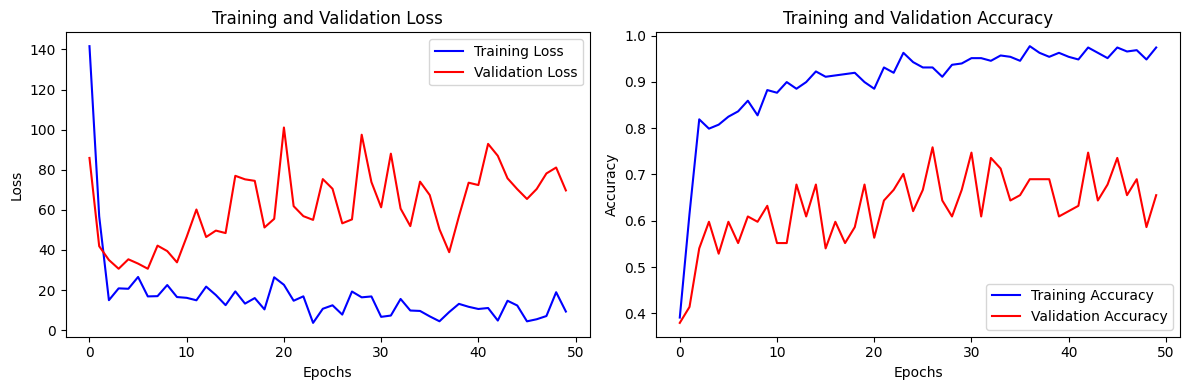

In [ ]:
import matplotlib.pyplot as plt

# Get the training history from the model.fit() function
#dohistory = model_001.fit(history)  # Replace with your model.fit() call

# Extract training loss and accuracy
train_loss = history_4002.history['loss']
train_accuracy = history_4002.history['accuracy']

# Extract validation loss and accuracy (if applicable)
val_loss = history_4002.history.get('val_loss')
val_accuracy = history_4002.history.get('val_accuracy')

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
if val_loss is not None:
    plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
if val_accuracy is not None:
    plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))


for layer in base_model.layers:
    layer.trainable = False


model_vgg16_010 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])


model_vgg16_010.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


model_vgg16_010.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 16, 16, 512)       14714688  
                                                                 
 flatten_9 (Flatten)         (None, 131072)            0         
                                                                 
 dense_27 (Dense)            (None, 512)               67109376  
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dense_29 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 81956420 (312.64 MB)
Trainable params: 

In [ ]:
# ModelCheckPoint
checkpoint_filepath = '/content/drive/MyDrive/p11v2_models/model_vgg16_010.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath,
                                   save_best_only=True,  # Save only the best model
                                   monitor='val_accuracy',   # Monitor validation loss
                                   mode='max',           # Minimize the monitored quantity (val_loss)
                                   verbose=1)




history_4002 = model_vgg16_010.fit(train_ds,
                              validation_data=val_ds,
                              epochs=50,
                              batch_size=32,
                              callbacks=[model_checkpoint])

Epoch 1/50
87/87 [==============================] - ETA: 0s - loss: 121.3594 - accuracy: 0.3764
Epoch 1: val_accuracy improved from -inf to 0.44828, saving model to /content/drive/MyDrive/p11v2_models/model_vgg16_010.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 34s 367ms/step - loss: 121.3594 - accuracy: 0.3764 - val_loss: 42.5916 - val_accuracy: 0.4483
Epoch 2/50
87/87 [==============================] - ETA: 0s - loss: 49.7867 - accuracy: 0.5948
Epoch 2: val_accuracy improved from 0.44828 to 0.56322, saving model to /content/drive/MyDrive/p11v2_models/model_vgg16_010.h5
87/87 [==============================] - 21s 241ms/step - loss: 49.7867 - accuracy: 0.5948 - val_loss: 29.1290 - val_accuracy: 0.5632
Epoch 3/50
87/87 [==============================] - ETA: 0s - loss: 26.3660 - accuracy: 0.7328
Epoch 3: val_accuracy improved from 0.56322 to 0.58621, saving model to /content/drive/MyDrive/p11v2_models/model_vgg16_010.h5
87/87 [==============================] - 40s 460ms/step - loss: 26.3660 - accuracy: 0.7328 - val_loss: 23.9884 - val_accuracy: 0.5862
Epoch 4/50
87/87 [==============================] - ETA: 0s - loss: 20.1632 - accuracy: 0.7787
Epoch 4: val_accuracy did not improve from 0.58621
87/87 [

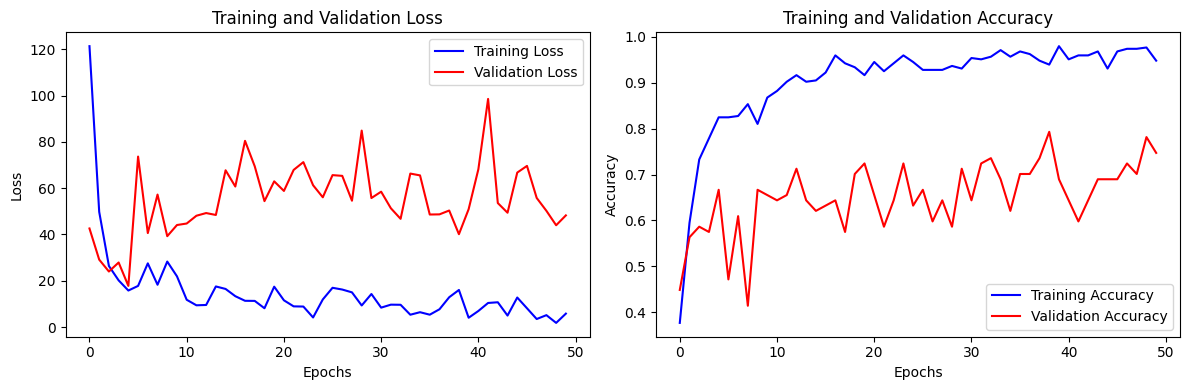

In [ ]:
import matplotlib.pyplot as plt

# Get the training history from the model.fit() function
#dohistory = model_001.fit(history)  # Replace with your model.fit() call

# Extract training loss and accuracy
train_loss = history_4002.history['loss']
train_accuracy = history_4002.history['accuracy']

# Extract validation loss and accuracy (if applicable)
val_loss = history_4002.history.get('val_loss')
val_accuracy = history_4002.history.get('val_accuracy')

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
if val_loss is not None:
    plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
if val_accuracy is not None:
    plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Load your best-performing model
best_model = tf.keras.models.load_model('/content/drive/MyDrive/p11v2_models/model_vgg16_010.h5')

# Define a function to get model performance metrics
def evaluate_model(model, dataset):
    # Initialize lists to store true labels and predicted labels
    true_labels = []
    predicted_labels = []

    # Iterate through the dataset to make predictions
    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_labels.extend(tf.argmax(predictions, axis=1))
        true_labels.extend(labels)

    # Calculate classification report and confusion matrix
    report = classification_report(true_labels, predicted_labels, target_names=['class_1', 'class_2', 'class_3', 'class_4'])
    matrix = confusion_matrix(true_labels, predicted_labels)

    return report, matrix

# Evaluate the model on the validation dataset
val_report, val_matrix = evaluate_model(best_model, val_ds)

# Print the classification report
print("Validation Classification Report:\n", val_report)

# Print the confusion matrix
print("Validation Confusion Matrix:\n", val_matrix)

1/1 [==============================] - 0s 27ms/step
Validation Classification Report:
               precision    recall  f1-score   support

     class_1       0.77      0.71      0.74        24
     class_2       0.71      0.89      0.79        19
     class_3       0.74      0.74      0.74        19
     class_4       0.95      0.84      0.89        25

    accuracy                           0.79        87
   macro avg       0.79      0.79      0.79        87
weighted avg       0.80      0.79      0.79        87

Validation Confusion Matrix:
 [[17  4  2  1]
 [ 0 17  2  0]
 [ 2  3 14  0]
 [ 3  0  1 21]]


# MobileNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Initialize MobileNetV2 base model
base_model = MobileNetV2(input_shape=(512, 512, 3),
                         weights='imagenet',
                         include_top=False)

# Set base model layers as non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Create data augmentation layer
data_augmentation_01 = Sequential([
    layers.RandomFlip('horizontal'),
    #layers.RandomRotation(0.1),
    #layers.RandomZoom(0.1)
])

# Create your custom model by adding layers on top of the base model
inputs = layers.Input(shape=(512, 512, 3))
x = data_augmentation_01(inputs)
output = base_model(x)
output = layers.Flatten()(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dropout(0.5)(output)
output = layers.Dense(256, activation='relu')(output)
output = layers.Dense(4, activation='softmax')(output)

model_mobnet_v2_010 = tf.keras.models.Model(inputs=inputs, outputs=output)

# Compile the model
model_mobnet_v2_010.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Print the model summary
model_mobnet_v2_010.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 sequential_7 (Sequential)   (None, 512, 512, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 16, 16, 1280)      2257984   
 tional)                                                         
                                                                 
 flatten_6 (Flatten)         (None, 327680)            0         
                                                                 
 dense_18 (Dense)            (None, 512)               167772672 
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                           

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


# ModelCheckPoint
checkpoint_filepath = '/content/drive/MyDrive/p11v2_models/model_mobnet_v3_010.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath,
                                   save_best_only=True,  # Save only the best model
                                   monitor='val_accuracy',   # Monitor validation loss
                                   mode='max',           # Minimize the monitored quantity (val_loss)
                                   verbose=1)



history_mobnet_v2_010 = model_mobnet_v2_010.fit(train_ds,
                              validation_data=val_ds,
                              epochs=50,
                              batch_size=32,
                              callbacks=[model_checkpoint])

Epoch 1/50
87/87 [==============================] - ETA: 0s - loss: 79.2899 - accuracy: 0.3017
Epoch 1: val_accuracy improved from -inf to 0.34483, saving model to /content/drive/MyDrive/p11v2_models/model_mobnet_v3_010.h5
87/87 [==============================] - 34s 322ms/step - loss: 79.2899 - accuracy: 0.3017 - val_loss: 27.3031 - val_accuracy: 0.3448
Epoch 2/50
87/87 [==============================] - ETA: 0s - loss: 22.7254 - accuracy: 0.3851
Epoch 2: val_accuracy did not improve from 0.34483
87/87 [==============================] - 7s 76ms/step - loss: 22.7254 - accuracy: 0.3851 - val_loss: 10.4063 - val_accuracy: 0.3333
Epoch 3/50
87/87 [==============================] - ETA: 0s - loss: 8.2954 - accuracy: 0.4569
Epoch 3: val_accuracy improved from 0.34483 to 0.35632, saving model to /content/drive/MyDrive/p11v2_models/model_mobnet_v3_010.h5
87/87 [==============================] - 29s 338ms/step - loss: 8.2954 - accuracy: 0.4569 - val_loss: 2.3622 - val_accuracy: 0.3563
Epoch 4/

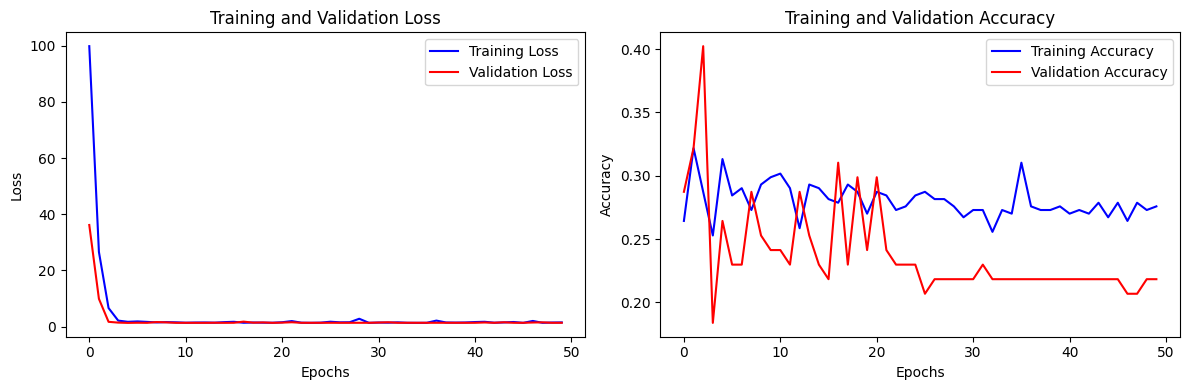

In [ ]:
import matplotlib.pyplot as plt

# Get the training history from the model.fit() function
#dohistory = model_001.fit(history)  # Replace with your model.fit() call

# Extract training loss and accuracy
train_loss = history_mobnet_v2_010.history['loss']
train_accuracy = history_mobnet_v2_010.history['accuracy']

# Extract validation loss and accuracy (if applicable)
val_loss = history_mobnet_v2_010.history.get('val_loss')
val_accuracy = history_mobnet_v2_010.history.get('val_accuracy')

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
if val_loss is not None:
    plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
if val_accuracy is not None:
    plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Initialize MobileNetV2 base model
base_model = MobileNetV2(input_shape=(512, 512, 3),
                         weights='imagenet',
                         include_top=False)

# Set base model layers as non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Create data augmentation layer
data_augmentation_01 = Sequential([
    layers.RandomFlip('horizontal'),
    #layers.RandomRotation(0.1),
    #layers.RandomZoom(0.1)
])

# Create your custom model by adding layers on top of the base model
inputs = layers.Input(shape=(512, 512, 3))
#x = data_augmentation_01(inputs)
output = base_model(inputs)
output = layers.Flatten()(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dropout(0.5)(output)
output = layers.Dense(256, activation='relu')(output)
output = layers.Dense(4, activation='softmax')(output)

model_mobnet_v2_010_without_aug = tf.keras.models.Model(inputs=inputs, outputs=output)

# Compile the model
model_mobnet_v2_010_without_aug.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Print the model summary
model_mobnet_v2_010_without_aug.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 16, 16, 1280)      2257984   
 tional)                                                         
                                                                 
 flatten_8 (Flatten)         (None, 327680)            0         
                                                                 
 dense_24 (Dense)            (None, 512)               167772672 
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                           

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


# ModelCheckPoint
checkpoint_filepath = '/content/drive/MyDrive/p11v2_models/model_mobnet_v3_010.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath,
                                   save_best_only=True,  # Save only the best model
                                   monitor='val_accuracy',   # Monitor validation loss
                                   mode='max',           # Minimize the monitored quantity (val_loss)
                                   verbose=1)



history_mobnet_v2_010 = model_mobnet_v2_010.fit(train_ds,
                              validation_data=val_ds,
                              epochs=50,
                              batch_size=32,
                              callbacks=[model_checkpoint])

Epoch 1/50
87/87 [==============================] - ETA: 0s - loss: 82.6773 - accuracy: 0.3075
Epoch 1: val_accuracy improved from -inf to 0.40230, saving model to /content/drive/MyDrive/p11v2_models/model_mobnet_v3_010.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 29s 278ms/step - loss: 82.6773 - accuracy: 0.3075 - val_loss: 27.0018 - val_accuracy: 0.4023
Epoch 2/50
87/87 [==============================] - ETA: 0s - loss: 30.0491 - accuracy: 0.4511
Epoch 2: val_accuracy improved from 0.40230 to 0.44828, saving model to /content/drive/MyDrive/p11v2_models/model_mobnet_v3_010.h5
87/87 [==============================] - 32s 371ms/step - loss: 30.0491 - accuracy: 0.4511 - val_loss: 10.0330 - val_accuracy: 0.4483
Epoch 3/50
87/87 [==============================] - ETA: 0s - loss: 13.5455 - accuracy: 0.4856
Epoch 3: val_accuracy did not improve from 0.44828
87/87 [==============================] - 7s 81ms/step - loss: 13.5455 - accuracy: 0.4856 - val_loss: 9.9491 - val_accuracy: 0.3448
Epoch 4/50
87/87 [==============================] - ETA: 0s - loss: 5.8909 - accuracy: 0.4684
Epoch 4: val_accuracy did not improve from 0.44828
87/87 [==============================] - 7s 82ms/step - loss: 5.8909 - accuracy: 0.4

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Load your best-performing model
best_model = tf.keras.models.load_model('/content/drive/MyDrive/p11v2_models/model_mobnet_v3_010.h5')

# Define a function to get model performance metrics
def evaluate_model(model, dataset):
    # Initialize lists to store true labels and predicted labels
    true_labels = []
    predicted_labels = []

    # Iterate through the dataset to make predictions
    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_labels.extend(tf.argmax(predictions, axis=1))
        true_labels.extend(labels)

    # Calculate classification report and confusion matrix
    report = classification_report(true_labels, predicted_labels, target_names=['class_1', 'class_2', 'class_3', 'class_4'])
    matrix = confusion_matrix(true_labels, predicted_labels)

    return report, matrix

# Evaluate the model on the validation dataset
val_report, val_matrix = evaluate_model(best_model, val_ds)

# Print the classification report
print("Validation Classification Report:\n", val_report)

# Print the confusion matrix
print("Validation Confusion Matrix:\n", val_matrix)


1/1 [==============================] - 0s 36ms/step
Validation Classification Report:
               precision    recall  f1-score   support

     class_1       0.45      0.42      0.43        24
     class_2       1.00      0.05      0.10        19
     class_3       0.38      0.79      0.52        19
     class_4       0.56      0.56      0.56        25

    accuracy                           0.46        87
   macro avg       0.60      0.45      0.40        87
weighted avg       0.59      0.46      0.42        87

Validation Confusion Matrix:
 [[10  0  8  6]
 [ 6  1 10  2]
 [ 1  0 15  3]
 [ 5  0  6 14]]


# Deployment

In [ ]:
import matplotlib.pyplot as plt

def predict_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(512, 512))
    img_array = img_to_array(img) / 255.0  # Rescale pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    predictions = model.predict(img_array)

    # Assuming you have a list of class labels
    class_labels = ["call_gesture", "loser_gesture", "thumbsUp_gesture", "victory_gesture"]

    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    # Display the image and predicted class
    plt.imshow(img)
    plt.title(f'Predicted Gesture: {predicted_class}')
    plt.axis('off')
    plt.show()

In [ ]:
predicted_class = predict_image('/content/drive/MyDrive/p11_v101_resized/thumpsUp_gesture/gest_thumbsUp_0023.jpg')